# SALES PREDICTION USING PYTHON

### Import the libraries and load the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
advert_df = pd.read_csv('Advertising.csv', index_col=0)
advert_df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Exploratory Data Analysis

In [13]:
advert_df.shape

(200, 4)

In [14]:
advert_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [15]:
advert_df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [16]:
# make all column names lower case for clarity
advert_df.columns = advert_df.columns.str.lower()
advert_df.head()

,tv,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [17]:
# Descriptive analysis
advert_df.describe()

,tv,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


#### Checking for Inconsistencies

In [18]:
# Checking for missing values
advert_df.isnull().sum()

tv           0
radio        0
newspaper    0
sales        0
dtype: int64

### Data Visualisation and Analysis



C:\Users\kmas\AppData\Local\Temp\ipykernel_15960\1731393953.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(advert_df['sales'], palette='bright')


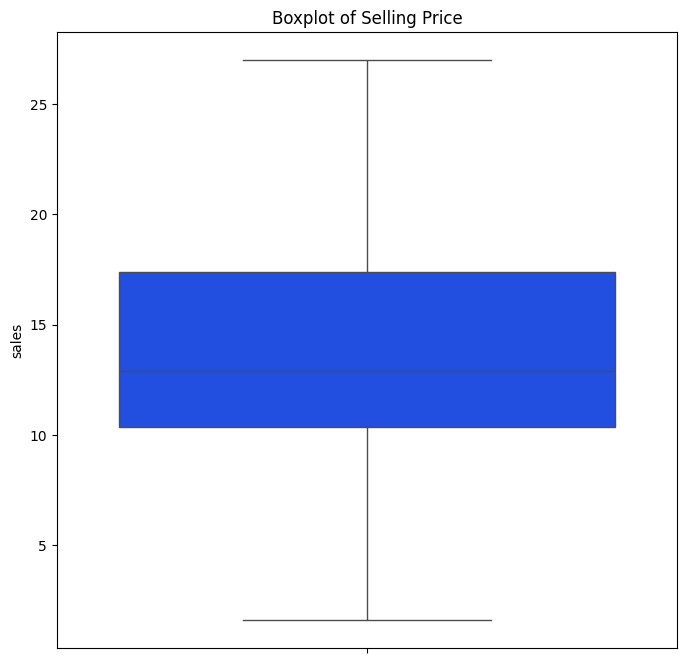

In [19]:
# Checking for ouliers
plt.figure(figsize=(8, 8))
sns.boxplot(advert_df['sales'], palette='bright')
plt.title('Boxplot of Selling Price')
plt.show()

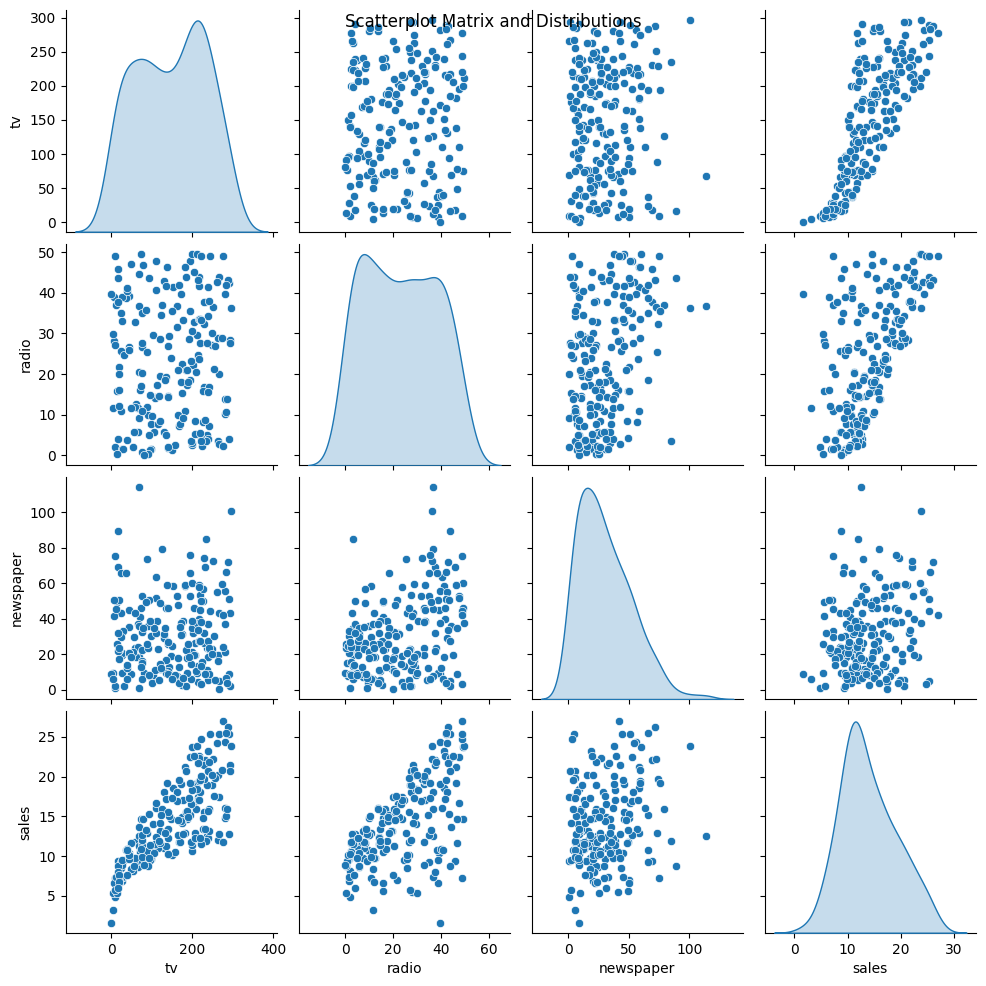

In [20]:
# Scatter Plot Matrix
#num_columns = ['year', 'selling_price', 'present_price', 'driven_kms', 'owner']
#num_columns_df = car_df[num_columns]
sns.pairplot(advert_df, diag_kind='kde') 
plt.suptitle("Scatterplot Matrix and Distributions") 
plt.show()

C:\Users\kmas\AppData\Local\Temp\ipykernel_15960\949275337.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_data = advert_df.groupby(pd.cut(advert_df[advert_type], bins=10))[['sales']].mean()
C:\Users\kmas\AppData\Local\Temp\ipykernel_15960\949275337.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_data.index.astype(str), y=group_data['sales'], palette='coolwarm')


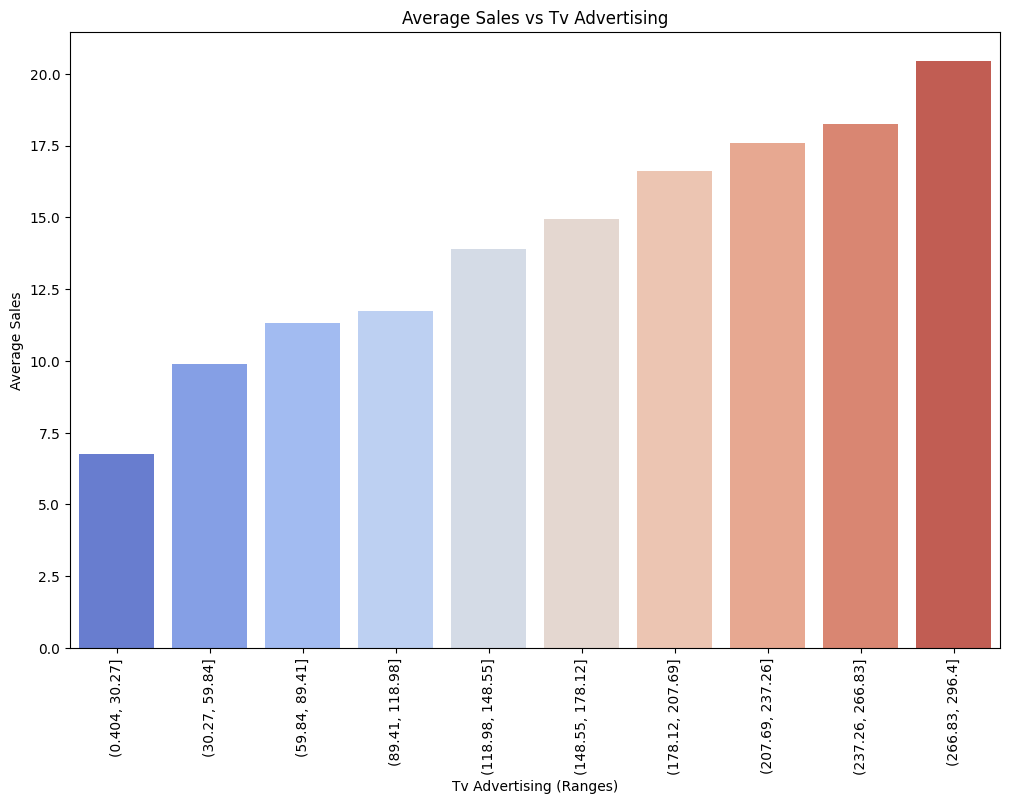

C:\Users\kmas\AppData\Local\Temp\ipykernel_15960\949275337.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_data = advert_df.groupby(pd.cut(advert_df[advert_type], bins=10))[['sales']].mean()
C:\Users\kmas\AppData\Local\Temp\ipykernel_15960\949275337.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_data.index.astype(str), y=group_data['sales'], palette='coolwarm')


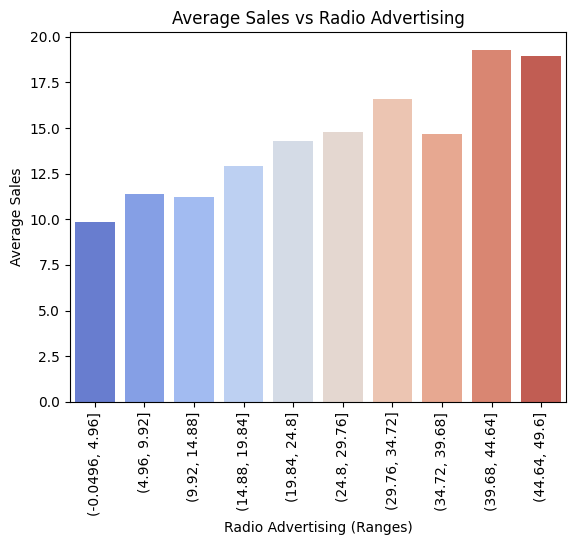

C:\Users\kmas\AppData\Local\Temp\ipykernel_15960\949275337.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_data = advert_df.groupby(pd.cut(advert_df[advert_type], bins=10))[['sales']].mean()
C:\Users\kmas\AppData\Local\Temp\ipykernel_15960\949275337.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_data.index.astype(str), y=group_data['sales'], palette='coolwarm')


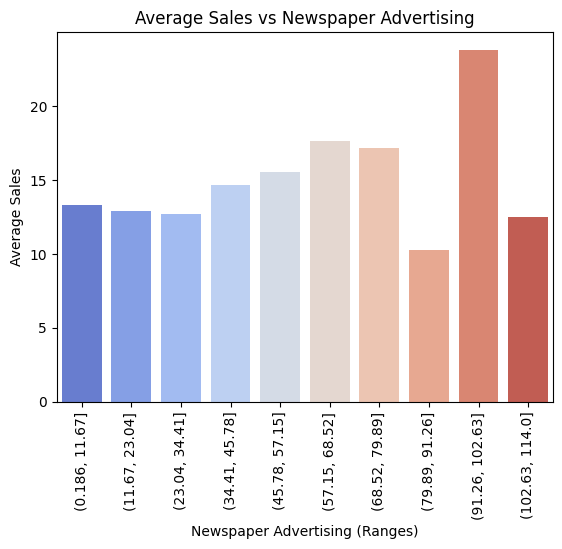

In [21]:
advert_types = ['tv', 'radio', 'newspaper']

# Create a figure for the plot
plt.figure(figsize=(12, 8))

# Iterate through each advertising type and plot its effect on sales
for i, advert_type in enumerate(advert_types):
    # mean sales for each group of advertising spending
    group_data = advert_df.groupby(pd.cut(advert_df[advert_type], bins=10))[['sales']].mean()
    
    # Create a bar plot for the current advertising type
    sns.barplot(x=group_data.index.astype(str), y=group_data['sales'], palette='coolwarm')
    plt.xlabel(f'{advert_type.capitalize()} Advertising (Ranges)')
    plt.ylabel('Average Sales')
    plt.title(f'Average Sales vs {advert_type.capitalize()} Advertising')
    plt.xticks(rotation=90)
    plt.show()

### Observations
 We can see that tv advertising has a positive impact on Sales, the more money spent on tv advert the more sales.

 Radio advert has some positive impact on sales too but newspaper advert has no correlation with sales.

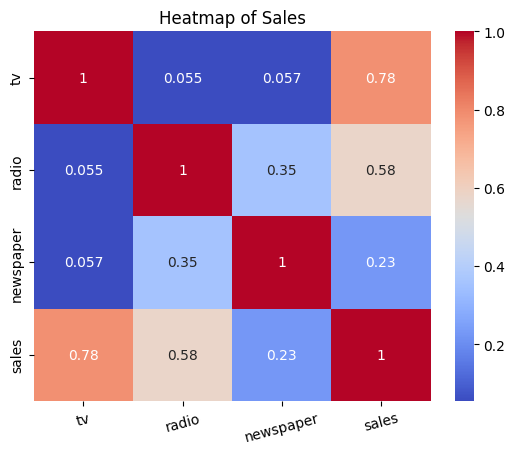

In [22]:
# Create the heatmap
sns.heatmap(advert_df.corr(),  annot=True, cmap='coolwarm')

# Customize the plot (optional)
plt.xticks(rotation=15)
plt.title("Heatmap of Sales")

# Display the plot
plt.show()

## Building a Gradient Boosting Regressor Model

In [23]:

# Model selection and feature scalling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
columns=["tv","radio","newspaper"]
advert_df[columns]=scaler.fit_transform(advert_df[columns])

In [24]:
X=advert_df.drop(columns="sales",axis=1)
y=advert_df["sales"]

In [25]:
# split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Train our model
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

### Model Evaluation

In [27]:
# Calculate the performance metrics
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [28]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.5308452163831914
R-squared: 0.9831817244706746


#### Observations
**MSE** provides an indication of how close the predictions are to the actual values. we have a lower score here which indicates that the model's predictions are closer to the actual values, and thus, the model is performing well.

**R-squared** 0.98 very close to 1, this higher values indicating a better fit. 

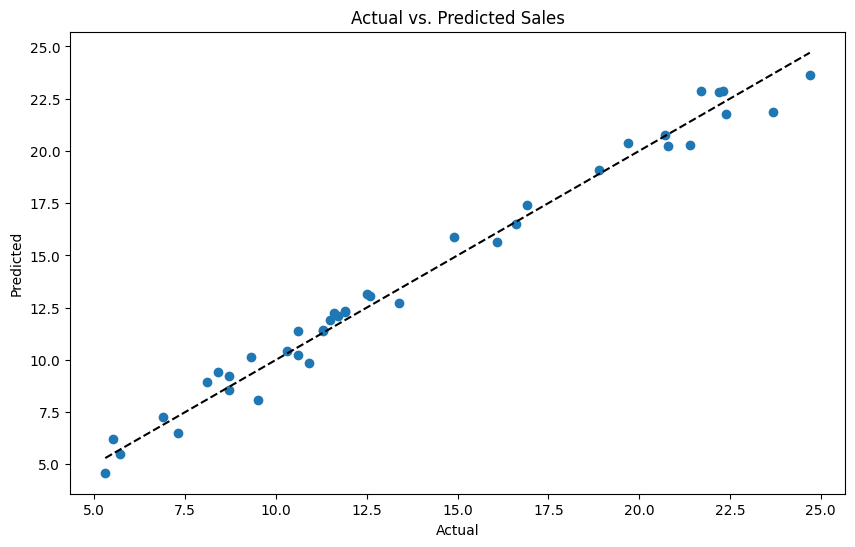

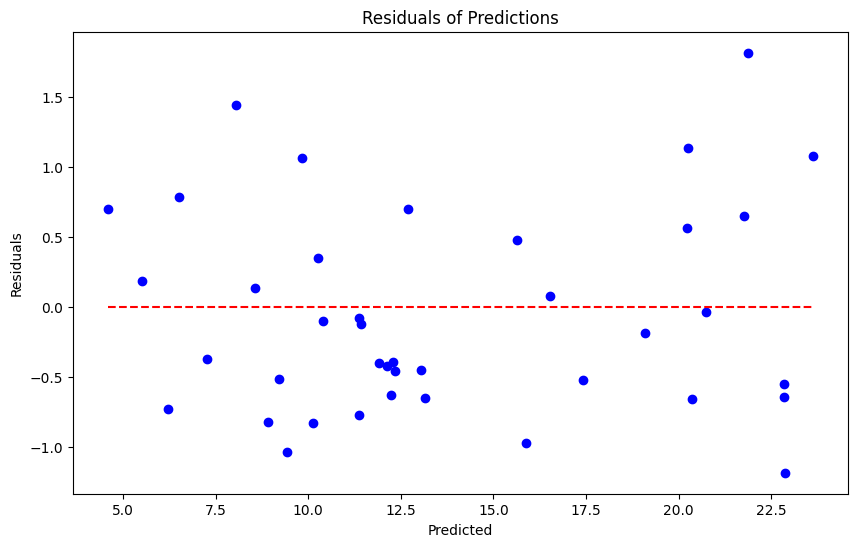

In [32]:
# Predict sales price on the test set
y_pred = gb.predict(X_test)

# Plotting the actual vs predicted values and fit the best fit line
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Sales')
plt.show()

# Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals, c='blue')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals of Predictions')
plt.show()

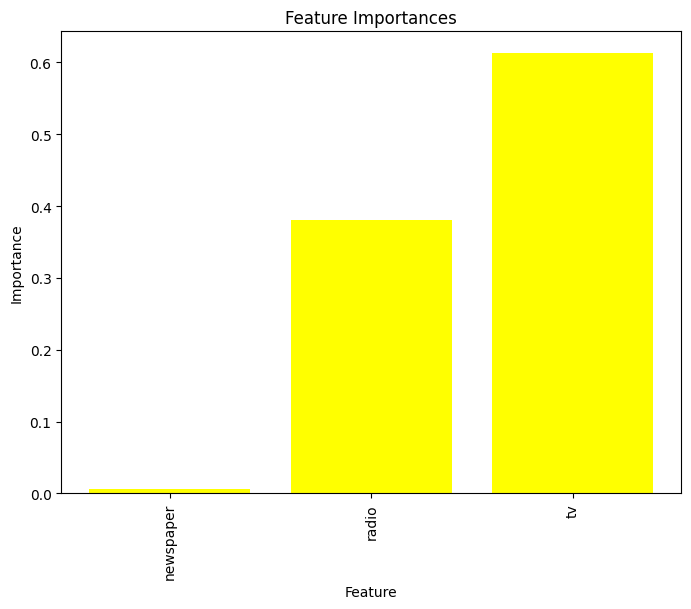

In [33]:
importances = gb.feature_importances_
feature_names = X.columns 
sorted_indices = np.argsort(importances)
plt.figure(figsize=(8, 6))
plt.bar(range(len(feature_names)), importances[sorted_indices], align='center',color="yellow")
plt.xticks(range(len(feature_names)), feature_names[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [35]:
# Prediction on unseen data
sample = np.array([[0.45, 0.85, 2.01]])  
prediction = gb.predict(sample)

print(f"Prediction:  \n{prediction}")

Prediction:  
[19.74404138]


c:\Users\kmas\OneDrive\Documents\Oasis Infobyte\o_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
